In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/amazon_jobs_data_set.csv",engine='python',encoding='utf-8')

In [3]:
df.head(5)

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
2,2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...


In [4]:
df.columns

Index(['Unnamed: 0', 'Title', 'location', 'Posting_date', 'DESCRIPTION',
       'BASIC QUALIFICATIONS', 'PREFERRED QUALIFICATIONS'],
      dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0                  0
Title                       0
location                    0
Posting_date                0
DESCRIPTION                 9
BASIC QUALIFICATIONS        9
PREFERRED QUALIFICATIONS    9
dtype: int64

In [6]:
df.shape

(3493, 7)

In [7]:
location = df['location'].dropna()

In [8]:
location=location.tolist() 

In [9]:
print(len(location))

3493


In [10]:
def findJobCntonlocation(location):
    requiredSkill = []
    for i in location:
        if(location in i):
            location.append(i)
    return(len(location)) 

In [11]:
findJobCntonlocation("IN, KA, Bangalore")

17

In [12]:
top5location = df['location'].value_counts()
top5location[0:5]

US, WA, Seattle       1856
US, CA, Sunnyvale      160
US, CA, Palo Alto      135
US, MA, Cambridge      118
CA, BC, Vancouver      113
Name: location, dtype: int64

In [13]:
top10Title = df['Title'].value_counts()
top10Title[0:10]

Software Development Engineer                                       700
Software Development Manager                                        122
Senior Software Development Engineer                                114
Sr. Software Development Engineer                                    58
Software Development Engineer                                        56
Software Development Engineer II                                     50
Web Development Engineer                                             20
Software Development Engineer, Amazon Alexa                          18
Senior Software Engineer                                             18
Software Development Engineer II - Alexa Deep Product Knowledge      17
Name: Title, dtype: int64

In [15]:
top10PREFERRED_QUALIFICATIONS = df['PREFERRED QUALIFICATIONS'].value_counts()
top10PREFERRED_QUALIFICATIONS[0:10]

#NAME?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [16]:
top5location = df['location'].value_counts()
top5location = top5location[0:5]
print(type(top5location))

<class 'pandas.core.series.Series'>


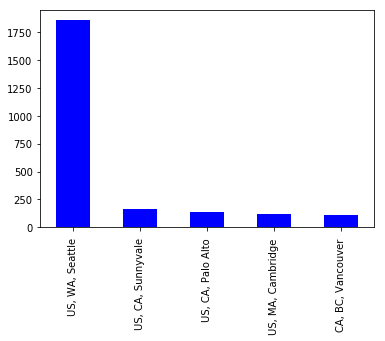

In [17]:
top5location.plot.bar(stacked=True, colormap='winter')

In [18]:
top5Title = df['Title'].value_counts()
top5Title[0:5]

Software Development Engineer           700
Software Development Manager            122
Senior Software Development Engineer    114
Sr. Software Development Engineer        58
Software Development Engineer            56
Name: Title, dtype: int64

In [19]:
diffTitle= df['Title'].dropna()

In [20]:
diffTitle.value_counts()

Software Development Engineer                                                             700
Software Development Manager                                                              122
Senior Software Development Engineer                                                      114
Sr. Software Development Engineer                                                          58
Software Development Engineer                                                              56
Software Development Engineer II                                                           50
Web Development Engineer                                                                   20
Software Development Engineer, Amazon Alexa                                                18
Senior Software Engineer                                                                   18
Software Development Engineer II - Alexa Deep Product Knowledge                            17
Software Development Engineer – In-Memory Distributed System

In [21]:
dfTitle= df['Title'].value_counts()
dfTitle = dfTitle[0:10]

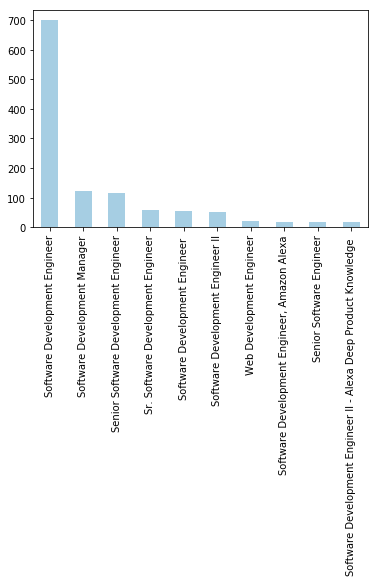

In [22]:
dfTitle.plot.bar(stacked=True, colormap='Paired')

# Analysis of Title Data

In [23]:
Title= df['Title'].dropna()

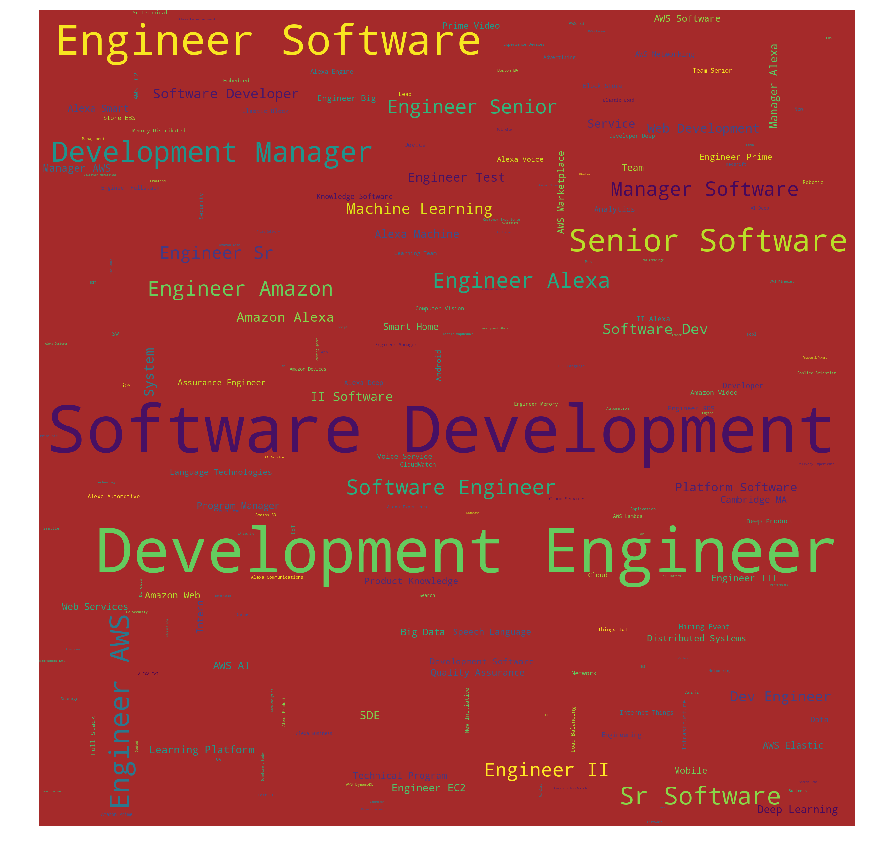

In [26]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (15,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(Title)

In [27]:
Title = Title.tolist()

In [28]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [29]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(Title))

print(data_words[:1])

[['software', 'development', 'manager']]


In [30]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['software', 'development', 'manager']


In [31]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [32]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['software', 'development', 'manager'], ['software', 'development', 'engineer'], ['software', 'development', 'engineer'], ['software', 'development', 'engineer', 'amazon', 'lex']]


In [33]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [34]:
id2word[0]

'development'

In [35]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('development', 1), ('manager', 1), ('software', 1)],
 [('development', 1), ('software', 1), ('engineer', 1)],
 [('development', 1), ('software', 1), ('engineer', 1)]]

# Build LDA Model for Title Data

In [36]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [37]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.082*"event" + 0.067*"dev" + 0.065*"iii" + 0.057*"technology" + '
  '0.047*"device" + 0.031*"seattle" + 0.030*"network" + 0.026*"ebs" + '
  '0.025*"store" + 0.020*"tool"'),
 (1,
  '0.213*"aws" + 0.072*"datum" + 0.051*"intern" + 0.042*"program" + 0.035*"rd" '
  '+ 0.019*"marketplace" + 0.017*"emr" + 0.014*"discovery" + 0.014*"placement" '
  '+ 0.014*"science"'),
 (2,
  '0.138*"developer" + 0.124*"service" + 0.064*"engine" + 0.057*"sde" + '
  '0.051*"amazon" + 0.040*"cloud" + 0.025*"storage" + 0.025*"com" + '
  '0.023*"load_balancing" + 0.020*"management"'),
 (3,
  '0.124*"system" + 0.092*"web" + 0.053*"language" + 0.051*"cambridge" + '
  '0.046*"speech" + 0.045*"director" + 0.041*"game" + 0.033*"content" + '
  '0.027*"quality" + 0.022*"assurance"'),
 (4,
  '0.277*"software" + 0.256*"development" + 0.247*"engineer" + 0.042*"manager" '
  '+ 0.023*"amazon" + 0.017*"alexa" + 0.012*"platform" + 0.010*"machine" + '
  '0.010*"ii" + 0.008*"learning"')]


In [38]:
# Compute Model Perplexity and Coherence Score

In [39]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -3.398939352382856

Coherence Score:  0.6329031036569553


In [40]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.431732  0.020068       1        1  78.010803
0     -0.127245  0.298680       2        1   5.981184
2     -0.058969 -0.163739       3        1   5.613369
1     -0.119466  0.022335       4        1   5.264292
3     -0.126052 -0.177343       5        1   5.130346, topic_info=    Category         Freq          Term        Total  loglift  logprob
2    Default  2922.000000      software  2922.000000  30.0000  30.0000
0    Default  2706.000000   development  2706.000000  29.0000  29.0000
3    Default  2605.000000      engineer  2605.000000  28.0000  28.0000
22   Default   152.000000           aws   152.000000  27.0000  27.0000
4    Default   283.000000        amazon   283.000000  26.0000  26.0000
21   Default   105.000000     developer   105.000000  25.0000  25.0000
36   Default    94.000000       service    94.000000  24.0000  24.0000
31   Default    87.000000        system    87.000000  23.0000  23.0000
37   Default    64.000000           web    64.000000  22.0000  22.0000
97   Default    66.000000         event    66.000000  21.0000  21.0000
64   Default    55.000000           dev    55.000000  20.0000  20.0000
25   Default    52.000000         datum    52.000000  19.0000  19.0000
80   Default    53.000000           iii    53.000000  18.0000  18.0000
195  Default    49.000000        engine    49.000000  17.0000  17.0000
72   Default    46.000000    technology    46.000000  16.0000  16.0000
23   Default    44.000000           sde    44.000000  15.0000  15.0000
112  Default    37.000000      language    37.000000  14.0000  14.0000
47   Default    36.000000        intern    36.000000  13.0000  13.0000
63   Default    38.000000        device    38.000000  12.0000  12.0000
177  Default    35.000000     cambridge    35.000000  11.0000  11.0000
113  Default    32.000000        speech    32.000000  10.0000  10.0000
421  Default    31.000000      director    31.000000   9.0000   9.0000
55   Default    30.000000       program    30.000000   8.0000   8.0000
9    Default    30.000000         cloud    30.000000   7.0000   7.0000
82   Default    29.000000          game    29.000000   6.0000   6.0000
1    Default   442.000000       manager   442.000000   5.0000   5.0000
121  Default    25.000000            rd    25.000000   4.0000   4.0000
99   Default    25.000000       seattle    25.000000   3.0000   3.0000
83   Default    25.000000       network    25.000000   2.0000   2.0000
260  Default    23.000000       content    23.000000   1.0000   1.0000
..       ...          ...           ...          ...      ...      ...
113   Topic5    31.767019        speech    32.499027   2.9472  -3.0839
421   Topic5    30.925882      director    31.674356   2.9461  -3.1108
82    Topic5    28.638760          game    29.374063   2.9446  -3.1876
260   Topic5    22.697737       content    23.449921   2.9374  -3.4201
7     Topic5    18.424934       quality    19.155069   2.9311  -3.6287
6     Topic5    14.970988     assurance    15.700874   2.9224  -3.8363
259   Topic5    12.815773    automation    13.557650   2.9137  -3.9917
258   Topic5    11.707725        boston    12.449252   2.9086  -4.0821
79    Topic5    11.070399  intelligence    11.808852   2.9054  -4.1381
378   Topic5     9.848891        leader    10.587291   2.8977  -4.2550
84    Topic5     9.787603        studio    10.523304   2.8975  -4.2612
231   Topic5     9.257173        design     9.990645   2.8937  -4.3170
117   Topic5     9.150900    initiative     9.884388   2.8929  -4.3285
419   Topic5     6.735408   recognition     7.475593   2.8657  -4.6350
277   Topic5     6.688385      identity     7.424629   2.8656  -4.6420
131   Topic5     6.253479   information     7.014251   2.8552  -4.7092
348   Topic5     5.749393  verification     6.483037   2.8499  -4.7933
225   Topic5     5.648293     front_end     6.382216   2.8478  -4.8110
439   Topic5     5.788570    

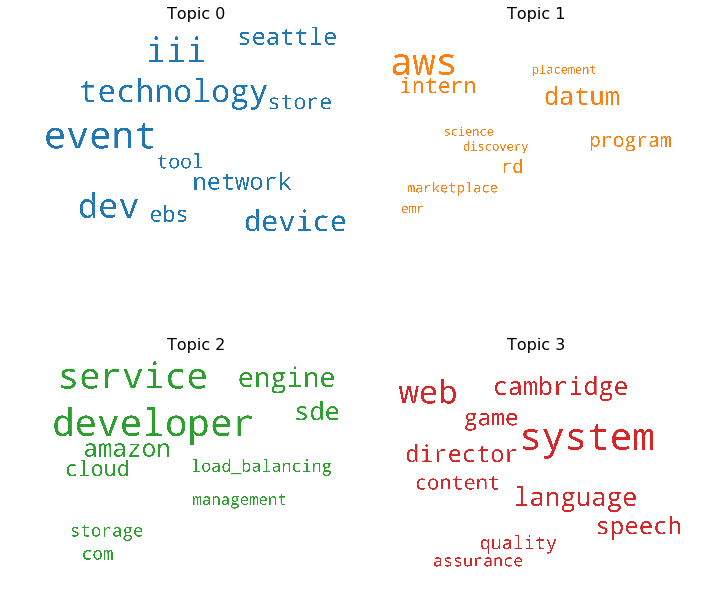

In [41]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [42]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [44]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [45]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.361825
1,0.010,6,0.439749
2,0.010,10,0.458945
3,0.010,15,0.471281
4,0.010,20,0.474434
5,0.100,2,0.360338
6,0.100,6,0.451333
7,0.100,10,0.458382
8,0.100,15,0.471898
9,0.100,20,0.476428


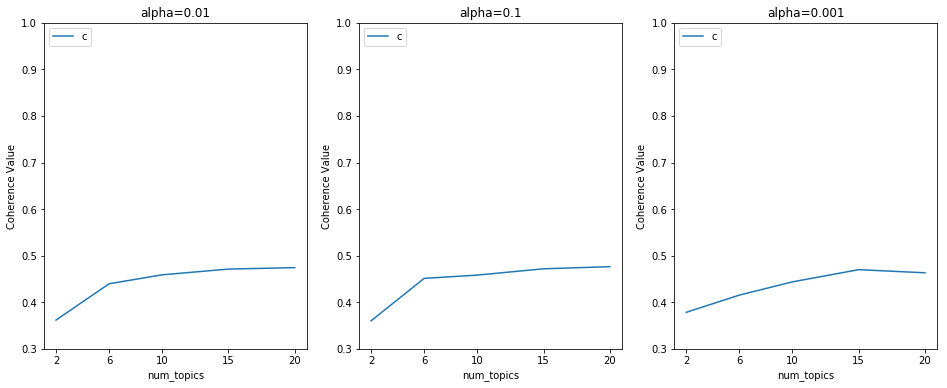

In [46]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [47]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [48]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.061*"ecs" + 0.002*"crest" + 0.002*"design" + 0.002*"leader" + 0.002*"sdm" '
  '+ 0.002*"corp" + 0.002*"level" + 0.002*"load_balancing" + 0.002*"chip" + '
  '0.002*"avs"'),
 (1,
  '0.304*"development" + 0.295*"software" + 0.290*"manager" + '
  '0.038*"technology" + 0.031*"device" + 0.010*"marketplace" + 0.007*"product" '
  '+ 0.000*"fulfillment" + 0.000*"planning" + 0.000*"capacity"'),
 (2,
  '0.244*"director" + 0.190*"engineering" + 0.176*"network" + '
  '0.105*"application" + 0.020*"border" + 0.020*"backbone" + '
  '0.011*"transportation" + 0.009*"india" + 0.001*"automation" + '
  '0.000*"control"'),
 (3,
  '0.255*"service" + 0.192*"web" + 0.188*"engineer" + 0.182*"development" + '
  '0.041*"management" + 0.027*"initiative" + 0.014*"search" + 0.009*"chime" + '
  '0.005*"beanstalk" + 0.001*"devop"'),
 (4,
  '0.323*"engineer" + 0.309*"software" + 0.296*"development" + 0.015*"ii" + '
  '0.011*"test" + 0.009*"iii" + 0.008*"networking" + 0.004*"ebs" + '
  '0.003*"store" + 0.003*"

In [49]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -4.949370721871711

Coherence Score:  0.549224448309231


In [50]:
coherence_model_lda.get_coherence_per_topic()

[0.6542625952554174,
 0.5326875273940908,
 0.5286395179897111,
 0.5682362835798775,
 0.5943378866959814,
 0.5021123975354713,
 0.5255667129648259,
 0.5617332465073591,
 0.4746516630277653,
 0.5150454668292215,
 0.5155769784817724,
 0.6217148720385839,
 0.49934628288180977,
 0.5409297047349032,
 0.6035255887216755]

In [51]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.407750 -0.056177       1        1  39.431686
1     -0.301659  0.138904       2        1  10.498829
5     -0.311180 -0.061911       3        1   9.571264
12    -0.066630  0.277651       4        1   6.107504
3     -0.186340 -0.191425       5        1   5.034999
6     -0.225031 -0.072559       6        1   4.962155
7      0.129387  0.043066       7        1   3.963050
13     0.091272  0.248572       8        1   3.234292
10     0.145120 -0.001765       9        1   3.068860
14     0.174301 -0.046002      10        1   2.784147
2      0.171774 -0.043470      11        1   2.466815
11     0.192519 -0.058659      12        1   2.380563
8      0.186368 -0.055227      13        1   2.299863
9      0.193734 -0.059173      14        1   2.215589
0      0.214115 -0.061826      15        1   1.980388, topic_info=    Category         Freq            Term        Total  loglift  logprob
3    Default  2205.000000        engineer  2205.000000  30.0000  30.0000
0    Default  2304.000000     development  2304.000000  29.0000  29.0000
2    Default  2497.000000        software  2497.000000  28.0000  28.0000
4    Default   364.000000          amazon   364.000000  27.0000  27.0000
1    Default   459.000000         manager   459.000000  26.0000  26.0000
21   Default   205.000000       developer   205.000000  25.0000  25.0000
31   Default   168.000000          system   168.000000  24.0000  24.0000
22   Default   196.000000             aws   196.000000  23.0000  23.0000
36   Default   175.000000         service   175.000000  22.0000  22.0000
23   Default   135.000000             sde   135.000000  21.0000  21.0000
25   Default   132.000000           datum   132.000000  20.0000  20.0000
82   Default   113.000000            game   113.000000  19.0000  19.0000
28   Default   136.000000            team   136.000000  18.0000  18.0000
37   Default   132.000000             web   132.000000  17.0000  17.0000
97   Default   107.000000           event   107.000000  16.0000  16.0000
10   Default   163.000000           alexa   163.000000  15.0000  15.0000
26   Default   105.000000           video   105.000000  14.0000  14.0000
421  Default    83.000000        director    83.000000  13.0000  13.0000
7    Default    76.000000         quality    76.000000  12.0000  12.0000
13   Default   120.000000        platform   120.000000  11.0000  11.0000
64   Default    85.000000             dev    85.000000  10.0000  10.0000
15   Default    65.000000     engineering    65.000000   9.0000   9.0000
6    Default    62.000000       assurance    62.000000   8.0000   8.0000
83   Default    60.000000         network    60.000000   7.0000   7.0000
12   Default    97.000000         machine    97.000000   6.0000   6.0000
38   Default    54.000000           voice    54.000000   5.0000   5.0000
112  Default    63.000000        language    63.000000   4.0000   4.0000
11   Default    82.000000        learning    82.000000   3.0000   3.0000
86   Default    48.000000            tool    48.000000   2.0000   2.0000
99   Default    50.000000         seattle    50.000000   1.0000   1.0000
..       ...          ...             ...          ...      ...      ...
175  Topic15     0.452539     environment     2.095061   2.3894  -6.3834
124  Topic15     0.452565           level     2.095318   2.3893  -6.3833
363  Topic15     0.452533            bios     2.095058   2.3894  -6.3834
439  Topic15     0.452562            chip     2.095378   2.3893  -6.3833
326  Topic15     0.452528              op     2.095012   2.3894  -6.3834
349  Topic15     0.452528            fpga     2.095020   2.3894  -6.3834
520  Topic15     0.452565            corp     2.095607   2.3892  -6.3833
126  Topic15     0.452548        firmware     2.095375   2.3893  -6.3834
232  Topic15     0.452542             dft     2.095281   2.3893  -6.3834
402  Topic15     0.452529       principle     

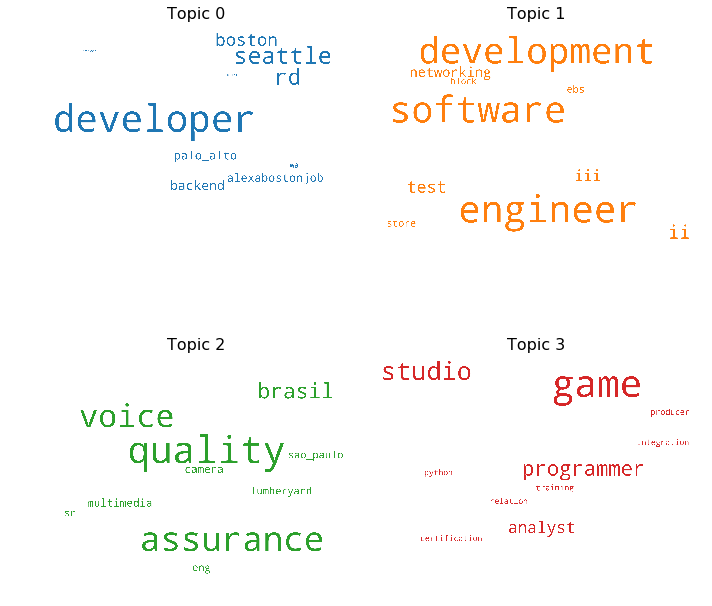

In [52]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()